In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
#load the dataset
data = pd.read_csv('green_tech_data.csv')

In [4]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [6]:
data.isnull().sum()

,0
carbon_emissions,0
energy_output,0
renewability_index,0
cost_efficiency,0
sustainability,0


In [7]:
#check data balance
data['sustainability'].value_counts()

,count
sustainability,
0,85
1,15


<Axes: >

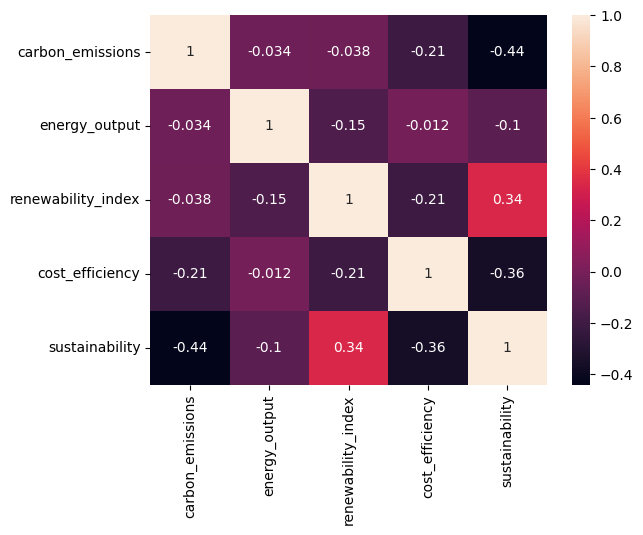

In [9]:
#heatmap
sns.heatmap(data.corr(), annot=True)

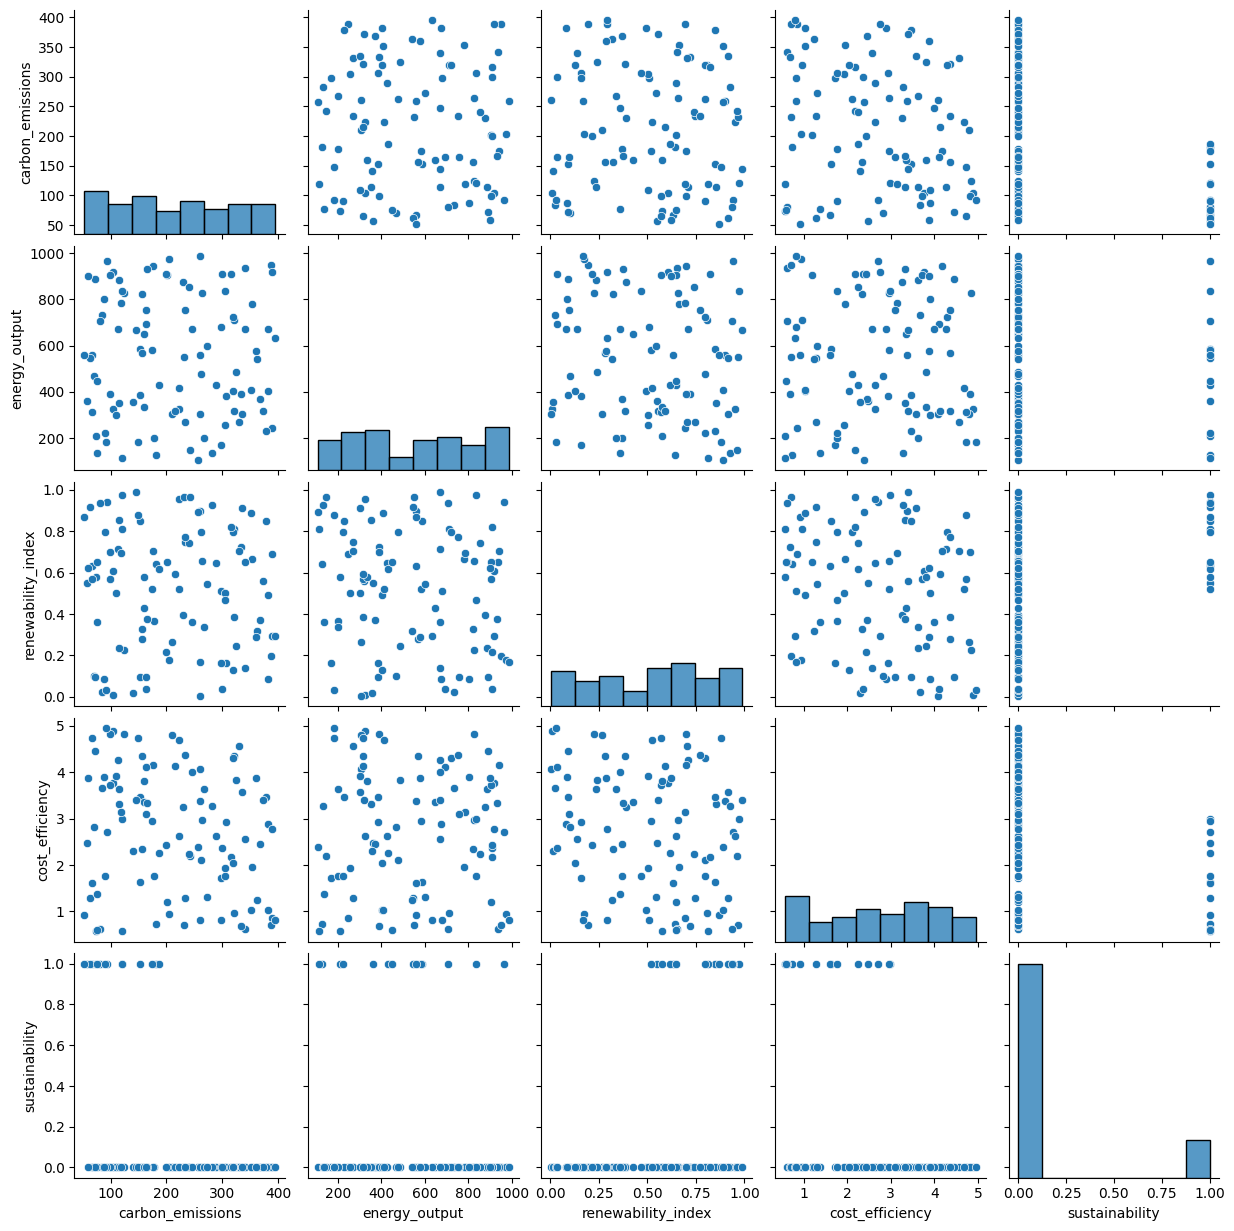

In [22]:
#pair plot
sns.pairplot(data)

In [43]:
x = data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [62]:
x_train.head()

,carbon_emissions,renewability_index,cost_efficiency
49,114.699059,0.853009,3.316370
34,387.971212,0.195243,0.707012
7,353.161651,0.663502,1.953304
95,222.828459,0.522243,4.688408
27,229.982053,0.393098,3.252743


In [63]:
model = LogisticRegression()
#train the model
model.fit(x_train, y_train)

LogisticRegression()

In [64]:
#accuracy
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [65]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [67]:
# Assuming 'model' is your trained LogisticRegression model
y_pred = model.predict(x_test)  # Generate predictions using x_test

# Now calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


<Axes: >

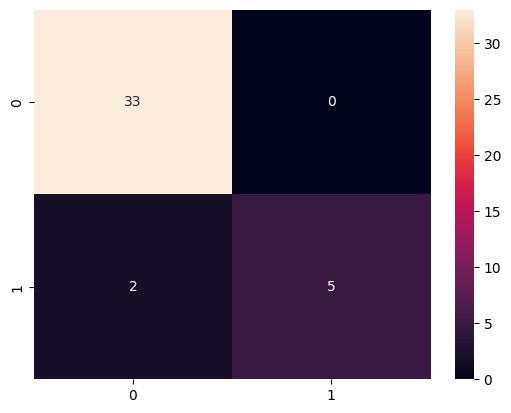

In [68]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)

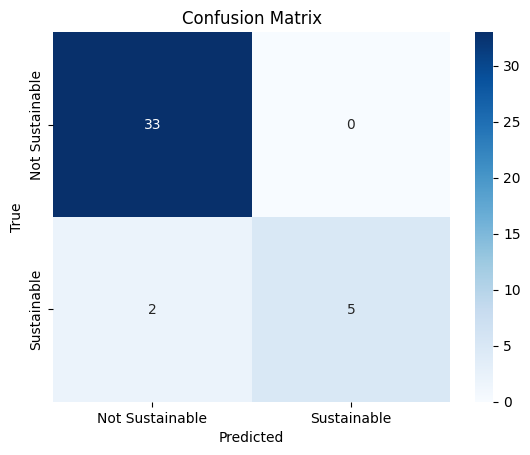

In [69]:
#confusion matrix graphically

conf_matrix=confusion_matrix(y_test,y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sustainable', 'Sustainable'],
            yticklabels=['Not Sustainable', 'Sustainable'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [70]:
#classification report
print(classification_report(y_test, y_pred, target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        33
    Sustainable       1.00      0.71      0.83         7

       accuracy                           0.95        40
      macro avg       0.97      0.86      0.90        40
   weighted avg       0.95      0.95      0.95        40



In [71]:
#feature importance
coefficients = pd.DataFrame(model.coef_.T, index=x.columns, columns=['coefficient'])
print(coefficients)

                    coefficient
carbon_emissions      -0.017791
renewability_index     0.712932
cost_efficiency       -1.230857


In [72]:
import joblib
#save the model to a file
joblib.dump(model, 'model_sustainable.pkl')

['model_sustainable.pkl']

In [73]:
#create a DataFrame with new data for prediction
new_data = pd.DataFrame({
    'carbon_emissions': [100,200,150],
    'renewability_index': [0.8,0.9,0.7],
    'cost_efficiency': [0.6,0.7,0.5]
})
#make predictions
predictions = model.predict(new_data)
print(predictions)

[1 0 1]
